In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv('https://www.dropbox.com/s/aa37fjiyy63l2h7/UsedCarPrice.csv?dl=1')
df

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [23]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [24]:
df.shape

(4340, 9)

In [25]:
df.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

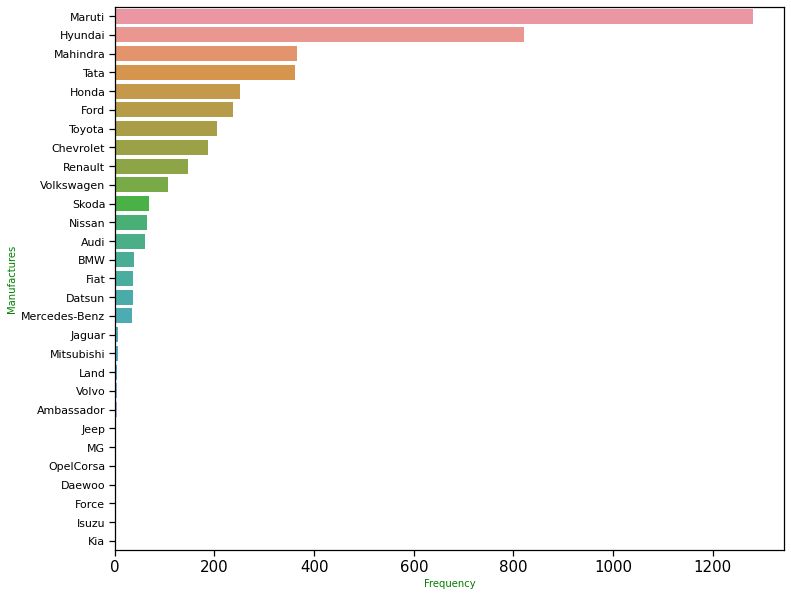

In [26]:
plt.figure(figsize=(12,10))
most_cat = df['Brand'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df)
plt.xticks(size=15)
plt.xlabel("Frequency",size=10,c="g")
plt.ylabel("Manufactures",size=10,c="g")
plt.show()

In [27]:
df['Brand'].value_counts()[df['Brand'].value_counts()<5]

Volvo         4
Ambassador    4
Jeep          3
MG            2
OpelCorsa     2
Daewoo        1
Force         1
Isuzu         1
Kia           1
Name: Brand, dtype: int64

In [28]:
i = df['Brand'].value_counts()[df['Brand'].value_counts()<5].index
index = df[df['Brand'].isin(i)].index
df.drop(index,axis=0,inplace=True)

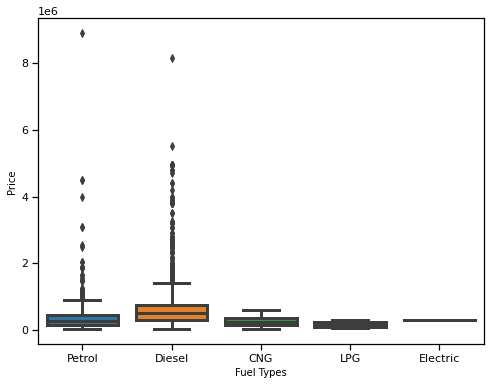

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Fuel",y="Selling_Price")
plt.xlabel("Fuel Types",size=10,c="k")
plt.ylabel("Price",size=10,c="k")
plt.show()

In [30]:
df['Fuel'].value_counts()[df['Fuel'].value_counts()<5]

Electric    1
Name: Fuel, dtype: int64

In [31]:
i = df['Fuel'].value_counts()[df['Fuel'].value_counts()<5].index
index = df[df['Fuel'].isin(i)].index
df.drop(index,axis=0,inplace=True)

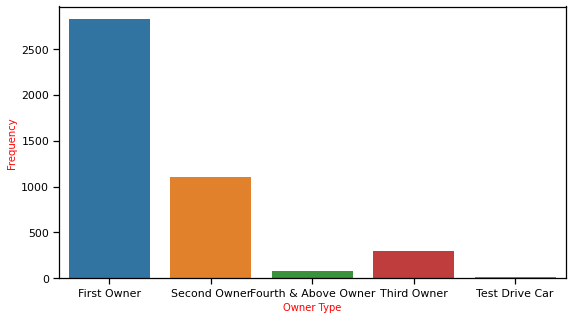

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x="Owner")
plt.xlabel("Owner Type",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")
plt.show()

In [33]:
df['Owner'].value_counts()

First Owner             2820
Second Owner            1102
Third Owner              302
Fourth & Above Owner      79
Test Drive Car            17
Name: Owner, dtype: int64

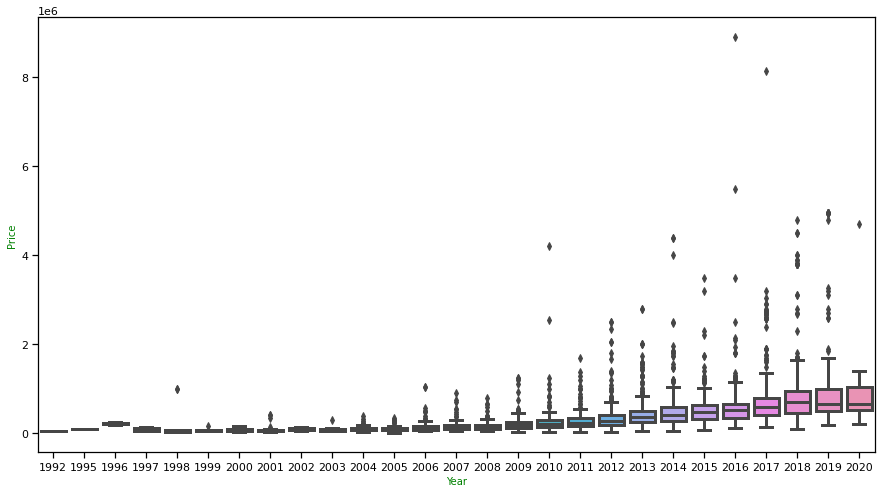

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x="Year",y="Selling_Price")
plt.xlabel("Year",size=10,c="g")
plt.ylabel("Price",size=10,c="g")
plt.show()

In [35]:
df['Year'].value_counts()

2017    464
2015    421
2012    413
2013    386
2014    365
2018    363
2016    357
2011    271
2010    234
2009    193
2019    191
2008    145
2007    134
2006    109
2005     83
2020     48
2004     41
2003     23
2001     20
2002     18
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: Year, dtype: int64

In [36]:
i = df['Year'].value_counts()[df['Year'].value_counts()<5].index
index = df[df['Year'].isin(i)].index
df.drop(index,axis=0,inplace=True)
df.describe()

,Year,Selling_Price,KM_Driven
count,4313.000000,4.313000e+03,4313.000000
mean,2013.123580,5.017680e+05,66243.433341
std,4.144959,5.738233e+05,46702.037454
min,1998.000000,2.000000e+04,1.000000
25%,2011.000000,2.100000e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


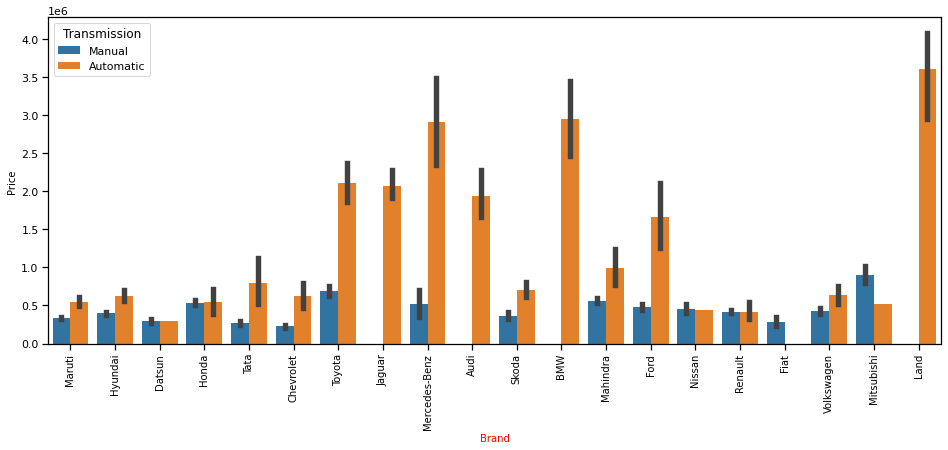

In [37]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,y="Selling_Price",x='Brand',hue='Transmission')
plt.xlabel("Brand",size=10,c="red")
plt.ylabel("Price",size=10,c="black")
plt.xticks(rotation="vertical",size=10)
plt.show()

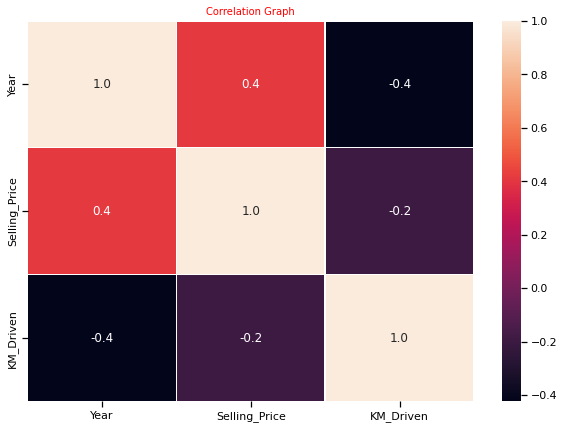

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=10)
plt.show()

In [39]:
df['Model'].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Mahindra NuvoSport N8                       1
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Hyundai i20 Magna 1.4 CRDi                  1
Name: Model, Length: 1470, dtype: int64

In [40]:
i = df['Model'].value_counts()[df['Model'].value_counts()<3].index
index = df[df['Model'].isin(i)].index

In [41]:
df[df['Model'].isin(i)]

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
12,Toyota,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner
25,Toyota,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner
26,Maruti,Maruti Ciaz VXi Plus,2015,585000,24000,Petrol,Dealer,Manual,First Owner
27,Hyundai,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner
28,Chevrolet,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4319,Maruti,Maruti Swift LDI,2012,400000,70000,Diesel,Individual,Manual,First Owner
4327,Tata,Tata Nano XM,2015,190000,60000,Petrol,Individual,Manual,Second Owner
4328,Mahindra,Mahindra Verito 1.5 D6 BSIII,2012,200000,112198,Diesel,Individual,Manual,Second Owner
4334,Toyota,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2012,600000,170000,Diesel,Individual,Manual,First Owner


In [42]:
df.drop(index,axis=0,inplace=True)
df = df.drop(["Brand"],axis = 1)
df

,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4333,Maruti Ritz VDi,2012,225000,90000,Diesel,Individual,Manual,Second Owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [43]:
df.shape

(3005, 8)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lst = ['Model','Fuel','Transmission','Seller_Type']
for i in lst:
    le = LabelEncoder()
    df[i]=le.fit_transform(df[i])
df['Owner'].value_counts()

First Owner             1955
Second Owner             785
Third Owner              216
Fourth & Above Owner      46
Test Drive Car             3
Name: Owner, dtype: int64

In [45]:
i = df['Owner'].value_counts()[df['Owner'].value_counts()<5].index
index = df[df['Owner'].isin(i)].index
df.drop(index,axis=0,inplace=True)
dic = {'First Owner':3,'Second Owner':2,'Third Owner':1,'Fourth & Above Owner':0}
df['Year'].value_counts()

2017    335
2013    311
2015    308
2012    304
2014    270
2016    251
2018    221
2011    193
2010    151
2009    131
2008    106
2019    103
2007     78
2006     75
2005     66
2004     31
2020     13
2001     13
2003     11
2002     10
1998      8
1999      7
2000      6
Name: Year, dtype: int64

In [46]:
dic1 = {2020:22, 2019:21, 2018:20,2017:19,2016:18,2015:17,2014:16,2013:15,2012:14,2011:13,2010:12,2009:11,2008:10,2007:9,2006:8,2005:7,2004:6,2003:5,2002:4 ,2001:3,2000:2,1999:1,1998:0}
df['Seller_Type'].value_counts()

1    2269
0     647
2      86
Name: Seller_Type, dtype: int64

In [47]:
#dic2 = {'Individual':2,'Dealer':1,'Trustmark Dealer':0}
df['Owner']=df['Owner'].map(dic)
df['Year']=df['Year'].map(dic1)
#df['Seller_Type']=df['Seller_Type'].map(dic2)
#from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
#names = df.columns
#d = scaler.fit_transform(df)
#df = pd.DataFrame(d, columns=names)
df.info

<bound method DataFrame.info of       Model  Year  Selling_Price  KM_Driven  Fuel  Seller_Type  Transmission  \
0       245     9          60000      70000     3            1             1   
1       345     9         135000      50000     3            1             1   
2       152    14         600000     100000     1            1             1   
3        36    19         250000      46000     3            1             1   
4        68    16         450000     141000     1            1             1   
...     ...   ...            ...        ...   ...          ...           ...   
4333    299    14         225000      90000     1            1             1   
4335    200    16         409999      80000     1            1             1   
4337    247    11         110000      83000     3            1             1   
4338    104    18         865000      90000     1            1             1   
4339    384    18         225000      40000     3            1             1   

      O

In [48]:
X = df.drop("Selling_Price",axis=1)   #X --- > Independent variables
Y= df['Selling_Price']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=132529)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred= lr.predict(X_test)
print("Accuracy on Traing set: ",lr.score(X_train,Y_train))
print("Accuracy on Testing set: ",lr.score(X_test,Y_test))

Accuracy on Traing set:  0.5147014210914029
Accuracy on Testing set:  0.49044229586003485


In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)
y_pred= rf.predict(X_test)

print("Accuracy on Training set: ",rf.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf.score(X_test,Y_test))

Accuracy on Training set:  0.988315289085949
Accuracy on Testing set:  0.9352179659884452
